# Kaggle data: Women’s Clothing E-Commerce dataset

Context
Welcome. This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

Content
This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

- Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
- Age: Positive Integer variable of the reviewers age.
- Title: String variable for the title of the review.
- Review Text: String variable for the review body.
- Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
- Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
- Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
- Division Name: Categorical name of the product high level division.
- Department Name: Categorical name of the product department name.
- Class Name: Categorical name of the product class name.

Dataset can be downloaded from here: https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Reading and investigating the data

In [4]:
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col=0) 
print("The shape of data=",data.shape)
data.head()

The shape of data= (23486, 10)


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


# Let's familiarize ourselves with regression and gradient descent.

In [ ]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Age Group
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,30-35
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,30-35
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses,60-70
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,50-60
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,40-50


Age and positive feedback count are numerical features but looking at their scatterplot it doesn't seem that there is a relationship there such that it would make sense to try to predict one with the other.

We could practise regression though by trying to predict age based on rating even though we can see from the pairplot in the data exploration notebook that all kinds of ratings are given by customers of all ages.

stopped at i: 334
smallest J: 76.13687729809888


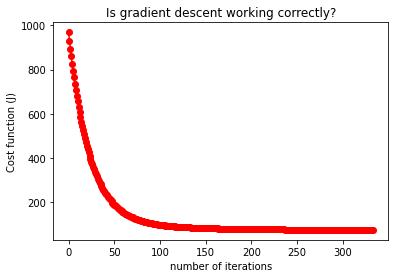

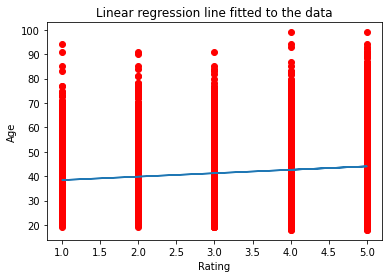

In [ ]:
#declare convergence if J decreases by less than 10^-3 in one iteration
import numpy as np
import csv
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, x, y):
        self.x = self.add_ones(x)
        self.y = y
        self.theta = self.initialize_theta()
        self.m = len(y)
    def initialize_theta(self):
        return np.zeros(2)
    def add_ones(self, x):
        return np.array([(1, elem) for elem in x])
    
    def cost_function(self):
        J = np.sum(np.power((np.dot(self.x, self.theta) - self.y), 2)) / (2 * self.m)
        return J
    
    def fit(self, alpha):
        self.alpha = alpha
        self.gradient_descent()
    def gradient_descent(self):
        self.J_history = []
        self.i_history = []
        self.i = 0
        while True: #as long as the error is getting smaller by 10 ^-3 on an iteration
            self.theta = self.theta - (self.alpha / self.m * np.dot((np.dot(self.x, self.theta) - self.y), self.x))
            J = self.cost_function()
            if self.i > 0:
                if (self.J_history[-1]-0.01) < J:
                    print("stopped at i:",self.i)
                    print("smallest J:",self.J_history[-1])
                    break
            self.J_history.append(J) #every J
            self.i_history.append(self.i) #and the eqvivalent number of iterations
            self.i = self.i+1
        #plot gradient descent progress    
        plt.plot(self.i_history,self.J_history, color='red', marker='o')
        plt.title('Is gradient descent working correctly?')
        plt.xlabel('number of iterations')
        plt.ylabel('Cost function (J)')
        plt.show()

    def predict(self, x):
        x = self.add_ones(x)
        return (np.dot(x, self.theta))
    
    def compare(self):
        plt.plot(self.x[:, 1], self.y, 'ro')
        plt.plot(self.x[:, 1], np.dot(self.x, self.theta))
        plt.title('Linear regression line fitted to the data')
        plt.xlabel('Rating')
        plt.ylabel('Age')
        
if __name__ == "__main__":
    x=data['Rating']
    y=data['Age']
    lr = LinearRegression(x, y)
    lr.fit(alpha= 0.1)
    lr.compare()

Not the best data to practise linear regression but it seems the older customers give slightly better ratings!
With learning rate 0.1 it took 334 iterations to converge (no significant improvement on further iterations). The learning rate defines the size of step taken in gradient descent.

# Other supervised learning methods: Classification

In [8]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


In [9]:
#Let's try to predict Recommend IND based on Age, Rating, Positive feedback count and Class name
data_sup= data[['Age','Rating','Recommended IND', 'Positive Feedback Count', 'Class Name']]
data_sup.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Class Name
0,33,4,1,0,Intimates
1,34,5,1,4,Dresses
2,60,3,0,0,Dresses
3,50,5,1,0,Pants
4,47,5,1,6,Blouses


In [10]:
print(data_sup['Class Name'].unique())

['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' 'Casual bottoms' nan 'Chemises']


In [11]:
#Let's turn the Class Name to numeric so it can be fed to a machine learning algorithm
# Create the mapping dictionary
lst = data_sup['Class Name'].unique()
class_mapping = {k: v for v, k in enumerate(lst)}
print(class_mapping)

{'Intimates': 0, 'Dresses': 1, 'Pants': 2, 'Blouses': 3, 'Knits': 4, 'Outerwear': 5, 'Lounge': 6, 'Sweaters': 7, 'Skirts': 8, 'Fine gauge': 9, 'Sleep': 10, 'Jackets': 11, 'Swim': 12, 'Trend': 13, 'Jeans': 14, 'Legwear': 15, 'Shorts': 16, 'Layering': 17, 'Casual bottoms': 18, nan: 19, 'Chemises': 20}


In [12]:
# Map the classes
data_sup['Class Name'] = data_sup['Class Name'].map(class_mapping)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
#Now we have numeric data
data_sup.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Class Name
0,33,4,1,0,0
1,34,5,1,4,1
2,60,3,0,0,1
3,50,5,1,0,2
4,47,5,1,6,3


In [14]:
#train test split
# Extract the target values from the training DataFrame
y = data_sup['Recommended IND']
# Drop the target column from the training DataFrame
df_train = data_sup.drop(['Recommended IND'], axis='columns')

1    19314
0     4172
Name: Recommended IND, dtype: int64

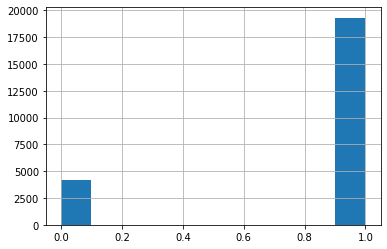

In [15]:
# Compute the fraction of positive values in the target: The dataset is not exactly balanced..
y.hist()
y.value_counts()

In [16]:
print(f'The training df currently has {df_train.shape[1]} features')

The training df currently has 4 features


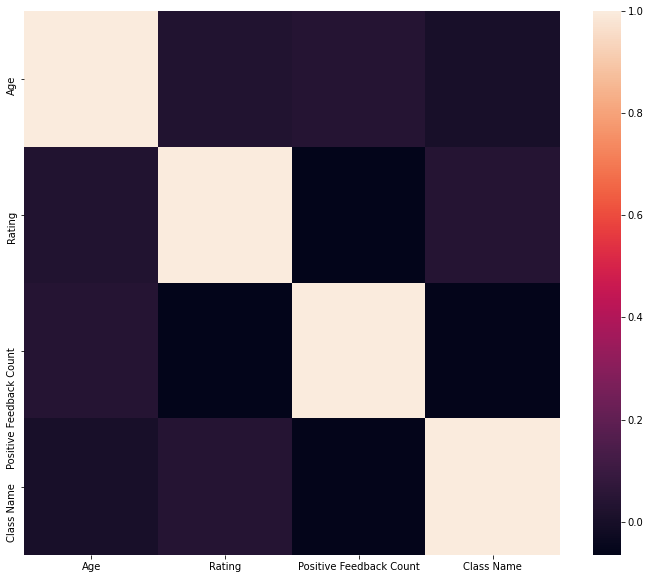

In [ ]:
plt.figure(figsize=(12,10))
### START CODE HERE ###
# Compute the Pearson Correlation of each feature in the training df
cor = df_train.corr(method='pearson') 
### END CODE HERE ###
# Plot the correlations. It seems that we don't have highly correlating features.
sns.heatmap(cor)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

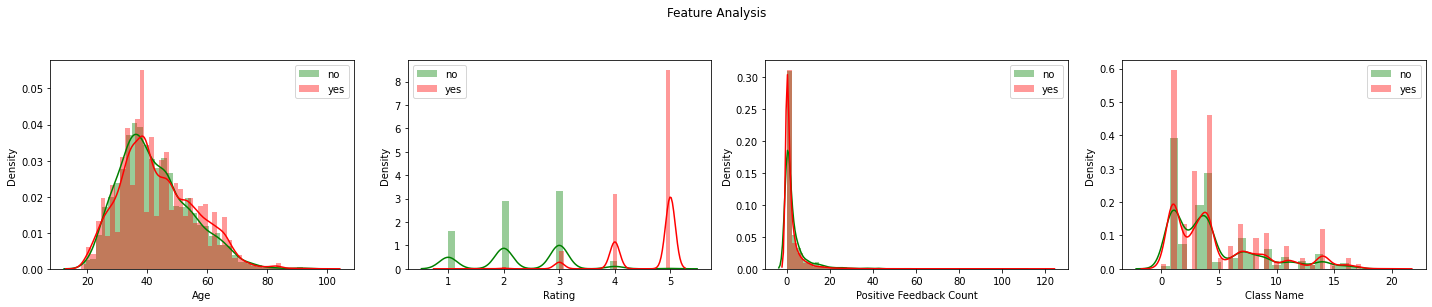

In [ ]:
# Visualize the selected features
fig = plt.figure(figsize = (20, 25))
j = 0
for i in df_train.columns:
    plt.subplot(7, 4, j+1)
    j += 1
    sns.distplot(df_train[i][y==0], color='g', label = 'no')
    sns.distplot(df_train[i][y==1], color='r', label = 'yes')
    plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [ ]:
### START CODE HERE ###
from sklearn.linear_model import LassoLarsCV
# Instantiate the cross-validated LASSO regressor
reg = LassoLarsCV(cv=5)
# Train the regressor on the reduced df
reg.fit(df_train, y)
### END CODE HERE ###
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(df_train, y))
coef = pd.Series(reg.coef_, index = df_train.columns)
print(f"Lasso picked {sum(coef != 0)} features and eliminated the other {sum(coef == 0)} features")

Best alpha using built-in LassoCV: 0.000000
Best score using built-in LassoCV: 0.628227
Lasso picked 4 features and eliminated the other 0 features


Text(0.5, 1.0, 'Feature importance using Lasso Model')

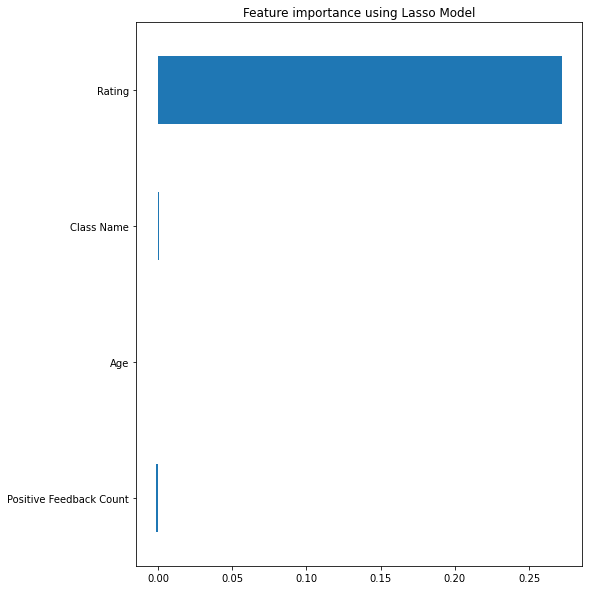

In [ ]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
#it seems that rating has a lot to do with whether someone recommends a product ;)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from numpy import mean

x_train, x_test, y_train, y_test = train_test_split(df_train.values, y.values, test_size = 0.3)

## Trying the Random Forest Classifier

In [ ]:
# Instantiate the classifier
# Set the max depth to 10, the random state to 0, and the class_weight to 'balanced'
clf = RandomForestClassifier(max_depth=10, random_state=0, class_weight='balanced')
# Train the classifier
clf.fit(x_train, y_train)
# Use the classifier to make predictions from the test features
prediction = clf.predict(x_test)
# Compute the confusion matrix between the true and predicted test targets
cm = confusion_matrix(y_test, prediction)
# Compute the model's accuracy by summing the diagonals of the confusion matrix
# (i.e. taking its trace) and dividing by the number of test samples

diagonal_sum = cm.trace()
sum_of_all_elements = cm.sum()
accuracy = diagonal_sum / sum_of_all_elements 
### END CODE HERE ###
print(f"Accuracy = {accuracy}")
recall_scores = cross_val_score(clf, x_test, y_test, scoring='recall', cv=5)
f1_scores = cross_val_score(clf, x_test, y_test, scoring='f1', cv=5)
print(f'Mean Recall = {mean(recall_scores):.3f}')
print(f'Mean F1 Score = {mean(f1_scores):.3f}')
print(cm)

Accuracy = 0.9341470337780301
Mean Recall = 0.931
Mean F1 Score = 0.958
[[1241   72]
 [ 392 5341]]


## Trying the Support Vector Classifier

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
# Instantiate the support vector classifier model
# Use a linear kernel and a regularization parameter of 1e10
model = SVC(C=10.0, kernel='linear')
# Train the model
model.fit(x_train, y_train)

SVC(C=10.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
prediction_SVM = model.predict(x_test)
# Compute the confusion matrix between the true and predicted test targets
cm = confusion_matrix(y_test, prediction_SVM)

In [ ]:
diagonal_sum = cm.trace()
sum_of_all_elements = cm.sum()
accuracy = diagonal_sum / sum_of_all_elements 
### END CODE HERE ###
print(f"Accuracy = {accuracy}")
recall_scores = cross_val_score(model, x_test, y_test, scoring='recall', cv=5)
f1_scores = cross_val_score(model, x_test, y_test, scoring='f1', cv=5)
print(f'Mean Recall = {mean(recall_scores):.3f}')
print(f'Mean F1 Score = {mean(f1_scores):.3f}')
print(cm)

Accuracy = 0.9351405052512064
Mean Recall = 0.930
Mean F1 Score = 0.959
[[1255   58]
 [ 399 5334]]


The confusion matric that Scikit learn produces:

                pred.
               0       1
    act.  0   TN      FP
          1   FN      TP

recall = TP /(TP+FN)

precision = TP / (TP+FP)




We could choose a model based on the confusion matrix and our use case by trying to think whether it is worse to have False negatives or False positives. We could also take a look at the cases that were classified incorrectly and try to understand why so we would get more insight into feature engineering.

## One approach instead of manually testing different algorithms would be to try out AutoML. Let's do that!

We will try out TPOT.
You can read more about it here: https://medium.com/rapids-ai/faster-automl-with-tpot-and-rapids-758455cd89e5

In [6]:
!pip install tpot

     |████████████████████████████████| 92kB 3.1MB/s 
     |████████████████████████████████| 163kB 17.0MB/s 
     |████████████████████████████████| 166.7MB 37kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp37-none-any.whl size=11954 sha256=db75c98a45dfeaad0cdde8d0cc845f1f062f8073e5933fe0bd99d1c35a2c8341
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [19]:
# TPOT for classification
from tpot import TPOTClassifier
# Instantiate and train a TPOT auto-ML classifier
# Set generations to 5, population_size to 40, and verbosity to 2 (so you can see each generation's performance)
tpot = TPOTClassifier(generations=5, population_size=40, verbosity=2, random_state = 42)
tpot.fit(x_train, y_train)
# Evaluate the classifier on the test data
# By default, the scoring function is accuracy
print(tpot.score(x_test, y_test))

tpot.export('tpot_pipeline.py')


Generation 1 - Current best internal CV score: 0.9364355231143552

Generation 2 - Current best internal CV score: 0.9364355231143552

Generation 3 - Current best internal CV score: 0.9365571776155719

Generation 4 - Current best internal CV score: 0.9365571776155719

Generation 5 - Current best internal CV score: 0.9365571776155719

Best pipeline: ExtraTreesClassifier(ZeroCount(input_matrix), bootstrap=True, criterion=entropy, max_features=0.6500000000000001, min_samples_leaf=15, min_samples_split=17, n_estimators=100)
0.933863184785694


Navigate to the tpot_pipeline.py and copy the recommended pipeline. Paste that to the code below to be saved to the exported pipeline variable. You might get different results on a new run even when setting a random state. It is possible to find a local optima as the problem to be solved is not convex.

In [22]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline, make_union
from sklearn.svm import LinearSVC
from tpot.builtins import StackingEstimator
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from tpot.builtins import ZeroCount

def return_tpot_results(x_train, y_train, x_test):
    ### START CODE HERE ###
    exported_pipeline = make_pipeline(
    ZeroCount(),
    ExtraTreesClassifier(bootstrap=True, criterion="entropy", max_features=0.6500000000000001, min_samples_leaf=15, min_samples_split=17, n_estimators=100)
)
    exported_pipeline.fit(x_train, y_train)
    prediction = exported_pipeline.predict(x_test)
    ### END CODE HERE ### 
    return prediction

pred = return_tpot_results(x_train, y_train, x_test)

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score

### START CODE HERE ###
# TPOT confusion matrix
cmtp = confusion_matrix(y_test, pred)
acc  = accuracy(y_test, pred)
rec  = recall(y_test, pred)
prec = precision(y_test, pred)
f1   = f1_score(y_test, pred)
### END CODE HERE ###
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cmtp)

Accuracy = 0.9355662787397104, Precision = 0.9821105890856523, Recall = 0.9386873920552677, F1-score = 0.9599081596608973
Confusion Matrix is:
[[1157   99]
 [ 355 5435]]


Slightly better accuracy compared to the previous try outs!